In [1]:
#데이터 수집->전처리->분석(시각화)->알고리즘 선택(ML,DL)->모델->예측/분류 문제 해결

In [3]:
#ML: 의사결정트리->가장 분류가 잘 되는 컬럼과 기준값 설정 (엔트로피 이용해서)

In [4]:
#의사결정트리는 나무 한 그루 (전문가 1명), 반면에 여러그루의 나무를 (숲, random forest)이용한 판단

In [5]:
#1. 데이터 불러오기 ->데이터 확인
#2. 탐색적 데이터 분석(EDA)
#3. 특성공학(데이터 전처리, feature engineering):변수들에 대한 다양한 연산들..
#4.모델링->모델 ->예측/분류->결과제출

In [1]:
pip install missingno

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd

In [3]:
plt.rcParams['font.family'] = 'AppleGothic'

## date타입의(object)데이터는 불러오기를 할 때 옵션 줌(연산할 수 있도록)-->parse_dates=['datetime']

In [4]:
dfTrain = pd.read_csv('train(1).csv', parse_dates=['datetime'])
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
dfTest = pd.read_csv('test.csv', parse_dates=['datetime'])
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [6]:
dfTrain.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
#퀴즈1, 각 컬럼별 결측값의 비율 출력

In [8]:
pd.isnull(dfTrain).sum()/len(dfTrain)
#dfTrain['datetime'].isnull.sum()

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

In [9]:
dfTrain.apply(lambda x: x.isnull().sum()/len(dfTrain))

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

In [10]:
dfTrain.isnull().sum(axis=0)  #각 열을 기준으로 null의 합
dfTrain.isnull().sum(axis=1)  #각 행을 기준으로 null의 합

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Length: 10886, dtype: int64

In [11]:
for c in dfTrain.columns:
    print('col:{:>10}\t percent of NaN : {: .2f}%'.format(c,dfTrain.isnull()[c].sum()/len(dfTrain)))

col:  datetime	 percent of NaN :  0.00%
col:    season	 percent of NaN :  0.00%
col:   holiday	 percent of NaN :  0.00%
col:workingday	 percent of NaN :  0.00%
col:   weather	 percent of NaN :  0.00%
col:      temp	 percent of NaN :  0.00%
col:     atemp	 percent of NaN :  0.00%
col:  humidity	 percent of NaN :  0.00%
col: windspeed	 percent of NaN :  0.00%
col:    casual	 percent of NaN :  0.00%
col:registered	 percent of NaN :  0.00%
col:     count	 percent of NaN :  0.00%


<AxesSubplot:>

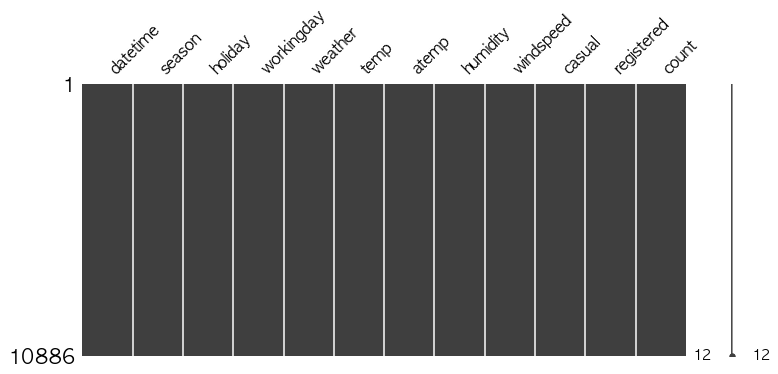

In [12]:
#결측값 시각화

msno.matrix(dfTrain,figsize=(12,5))  #결측값이 흰색 선 모양으로 나옴

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

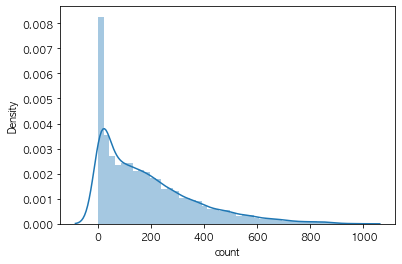

In [13]:
sns.distplot(dfTrain['count'])

### skewness(비대칭도) : 분포가 얼마나 비대칭인지를 알려주는 척도, 0이면 정규분포, <0이면 오른쪽으로 치우침, >0이면 왼쪽으로 치우침
### skew함수

In [14]:
dfTrain['count'].skew()

1.2420662117180776

### kurtosis(첨도):확률분포의 뾰족한 정도

In [15]:
#0: 표준정규분포
#<0: 표준정규분포보다 넓게 퍼져있다(둥글다)
#>0:                뾰족하다

dfTrain['count'].kurt()  

1.3000929518398334

In [16]:
dfTrain['datetime'].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [17]:
dfTrain['year']=dfTrain['datetime'].dt.year
dfTrain['month']=dfTrain['datetime'].dt.month
dfTrain['day']=dfTrain['datetime'].dt.day
dfTrain['hour']=dfTrain['datetime'].dt.hour


In [18]:
dfTest['year']=dfTrain['datetime'].dt.year
dfTest['month']=dfTrain['datetime'].dt.month
dfTest['day']=dfTrain['datetime'].dt.day
dfTest['hour']=dfTrain['datetime'].dt.hour

In [19]:
#x축:년/월/일/시
#y축: count의 합

In [20]:
dfTrain['count']



0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [21]:
#퀴즈2
#dfTrain['year']별로 그룹화를 한다음, 그룹별 count합계와 평균을 출력

In [22]:
dfTrain.groupby('year')['count'].sum()
dfTrain.groupby('year')['count'].mean()

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

In [23]:
dfTrain.pivot_table(index='year', values='count', aggfunc=['sum','mean'])

,sum,mean
,count,count
year,,
2011,781979,144.223349
2012,1303497,238.560944


<AxesSubplot:>

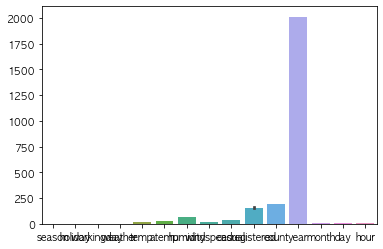

In [24]:
sns.barplot(data=dfTrain)
#barplot에서 y축 별도로 설정하지 않으면 , 전체 평균값 barplot에서 y축을 설정하면, 설정된 컬럼의 평균값

<AxesSubplot:xlabel='hour', ylabel='count'>

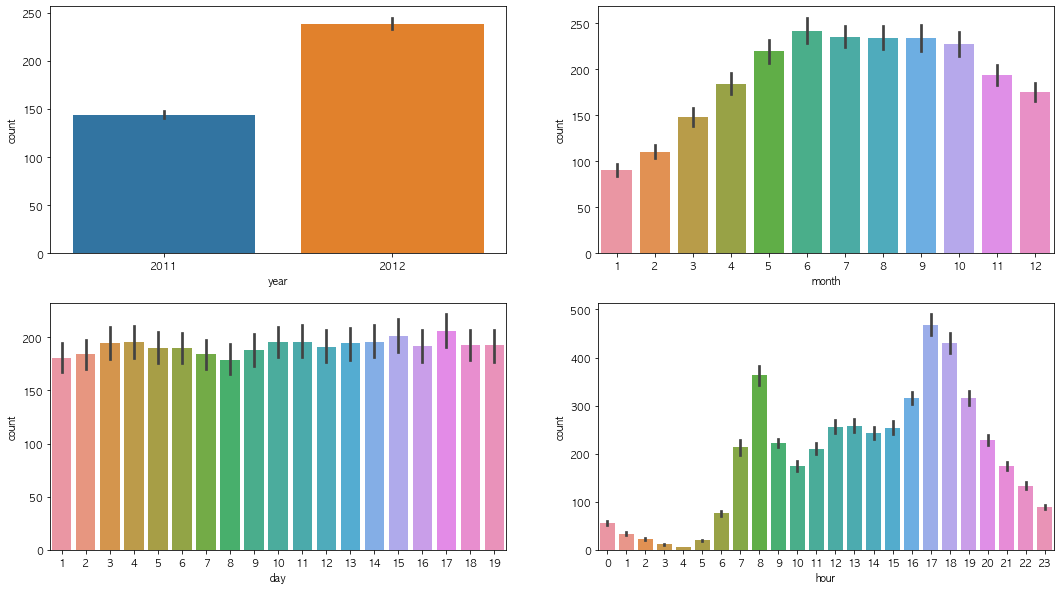

In [25]:
import matplotlib.pyplot as plt
fig,axes= plt.subplots(nrows=2, ncols=2)

fig.set_size_inches(18,10)

sns.barplot(data=dfTrain, x='year',y='count',ax=axes[0][0])  #연도별 count의 평균
sns.barplot(data=dfTrain, x='month',y='count',ax=axes[0][1])  #연도별 count의 평균
sns.barplot(data=dfTrain, x='day',y='count',ax=axes[1][0])  #연도별 count의 평균
sns.barplot(data=dfTrain, x='hour',y='count',ax=axes[1][1])  #연도별 count의 평균

In [26]:
dfTrain['dayofweek']=dfTrain['datetime'].dt.dayofweek   #요일추출
#0:월요일, 6:일요일

In [27]:
dfTest['dayofweek']=dfTest['datetime'].dt.dayofweek

In [28]:
dfTrain.shape

(10886, 17)

In [29]:
#퀴즈3.
#각 요일별 데이터 건수를 출력


In [30]:
dfTrain.groupby('dayofweek').size()

dayofweek
0    1551
1    1539
2    1551
3    1553
4    1529
5    1584
6    1579
dtype: int64

In [31]:
dfTrain['dayofweek'].count

<bound method Series.count of 0        5
1        5
2        5
3        5
4        5
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: dayofweek, Length: 10886, dtype: int64>

In [32]:
dfTrain.groupby('dayofweek')['datetime'].count()

dayofweek
0    1551
1    1539
2    1551
3    1553
4    1529
5    1584
6    1579
Name: datetime, dtype: int64

In [33]:
dfTrain['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

### x축 hour로 고정하고, y축 count-> 시간의 흐름에 따라 대여량 변화가 어떤 패턴이 있는지 조사

<AxesSubplot:xlabel='hour', ylabel='count'>

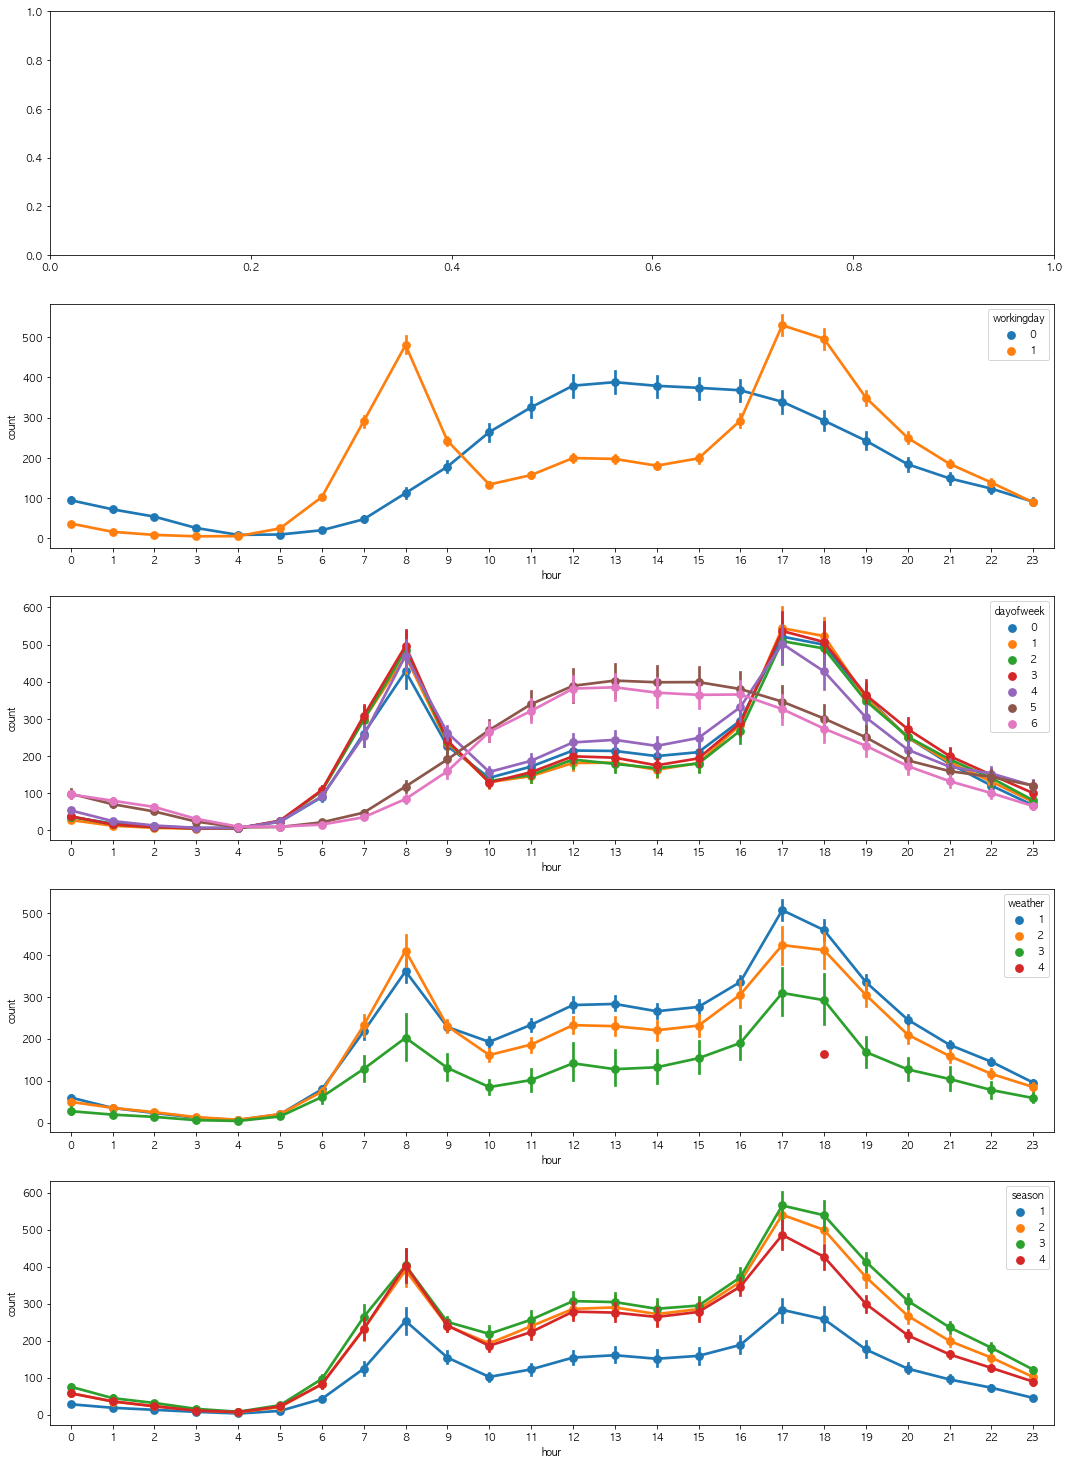

In [34]:
fig,axes = plt.subplots(nrows=5)
fig.set_size_inches(18,26)

sns.pointplot(data=dfTrain, x='hour',y='count',hue='workingday',ax=axes[1])
sns.pointplot(data=dfTrain, x='hour',y='count',hue='dayofweek',ax=axes[2])
sns.pointplot(data=dfTrain, x='hour',y='count',hue='weather',ax=axes[3])
sns.pointplot(data=dfTrain, x='hour',y='count',hue='season',ax=axes[4])



## 상관계수행렬

In [35]:
dfTrain.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [36]:
cData=dfTrain[['temp','atemp','humidity','windspeed','casual','registered','count']]

In [37]:
cData.corr()  #상관계수 구하기

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

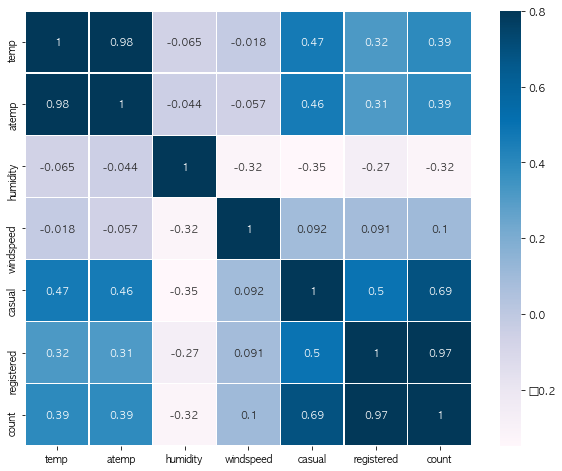

In [38]:
plt.subplots(figsize=(10,8))
sns.heatmap(cData.corr(), linecolor='white',linewidths=0.2,annot=True,cmap=plt.cm.PuBu, vmax=0.8,annot_kws={'size':10})